In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap.umap_ as umap

/Users/orikanner/Documents/python/meta_snap_project/snap_table/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def create_umap(
    npz_file_name="combined_requests",
    csv_file_name="combined_requests_clustered",
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
):
    """
    Applies UMAP to the embeddings and adds the results to the dataframe.
    """
    npz_path=f"../data/embeddings/{npz_file_name}.npz"
    csv_path=f"../outputs/{csv_file_name}.csv"
    # Load data
    npz = np.load(npz_path, allow_pickle=True)
    df = pd.read_csv(csv_path)
    assert len(npz["requests"]) == len(df), "Mismatch in request count"
    df["request"] = npz["requests"]
    np.vstack(npz["embeddings"])

    reducer = umap.UMAP(
        n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components
    )
    embedding = reducer.fit_transform(npz["embeddings"])

    df["x"] = embedding[:, 0]
    df["y"] = embedding[:, 1]

    return df


def show_umap(df, title="Combined Requests: UMAP Cluster Map"):
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        data=df, x="x", y="y", hue="cluster", palette="tab10", s=60, alpha=0.9
    )
    plt.title(title)
    plt.xlabel("UMAP 1")
    plt.ylabel("UMAP 2")
    plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True, linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.show()

## Combined requests

/Users/orikanner/Documents/python/meta_snap_project/snap_table/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


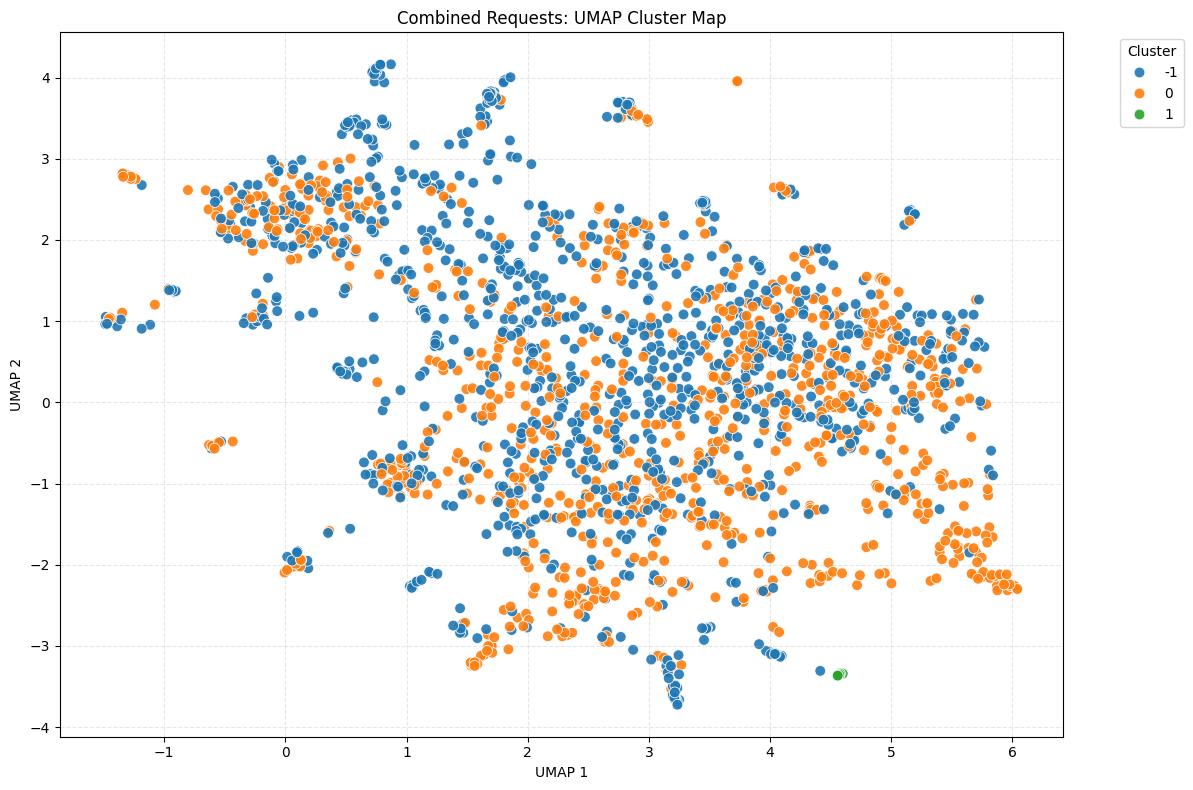

In [4]:
df = create_umap()
show_umap(df)

In [12]:
df.groupby("cluster")["request"].apply(lambda x: x.sample(min(5, len(x)))).to_frame()

request
cluster                                                        
-1      1862                         Anitta Envolver, Bad Bunny
        488                                       Make you mine
        1331                          Alien superstar (Beyoncé)
        877   Rihanna - S&M \nBritney spears- Till the world...
        1374                                              Sunny
 0      1949  212 (אבל לא רק עד הפזמון!!)❤️ יש ריקוד\nSlat p...
        460                                           doechii!!
        1854      האוס, טרקים, מוזיקה אלקטרונית. פליז לא רק פופ
        101                           אומרים שהיה שמח אז אני בא
        110                          יש סיכוי שאהיה במילואים :(
 1      1648                                 Everytime we touch
        1000                       cascada - everytime we touch
        385                               Everytime we touch!!!
        484                                 every time we touch
        1004                   Everytime we touch - cascada (?)

## Song Requests

/Users/orikanner/Documents/python/meta_snap_project/snap_table/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


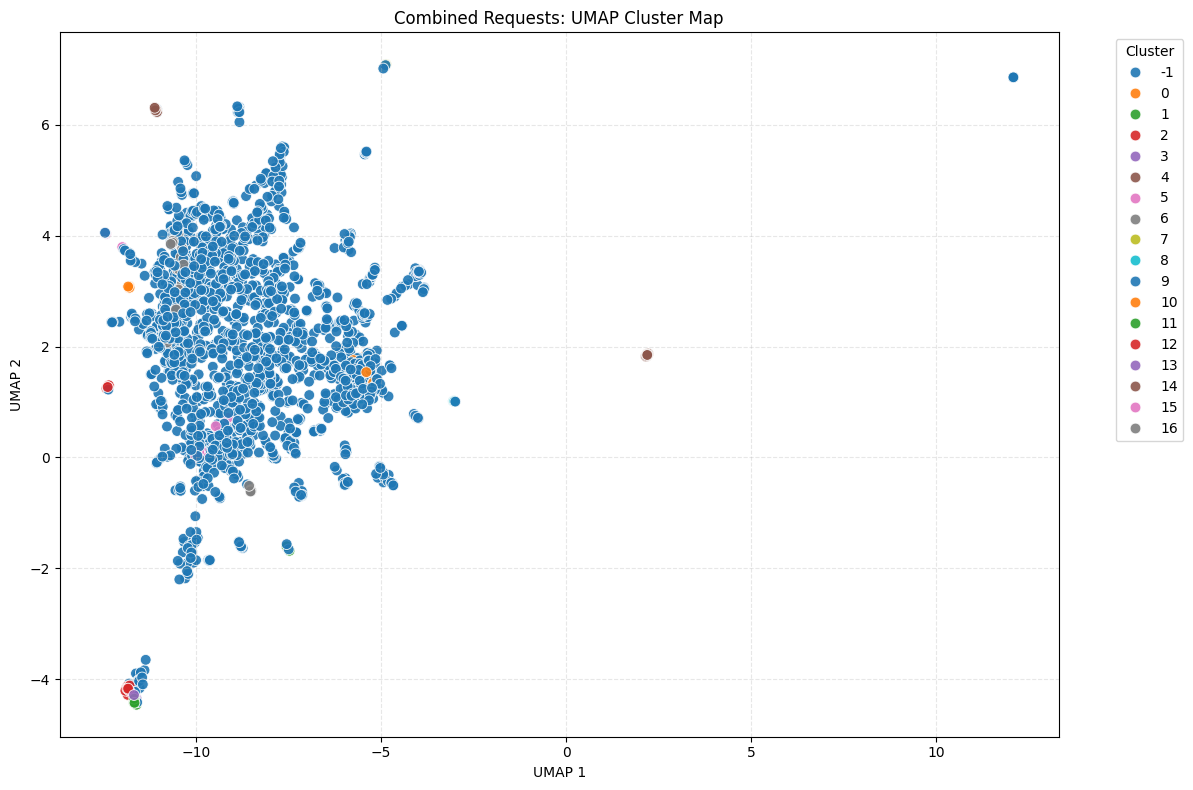

In [6]:
song_reqs_df = create_umap(npz_file_name="song_requests", csv_file_name="song_requests_clustered")
show_umap(song_reqs_df)

In [13]:
song_reqs_df.groupby("cluster")["request"].apply(lambda x: x.sample(min(3, len(x)))).to_frame()

request
cluster                                                        
-1      1689                    SUMMER RENAISSANCE של ביונסה ♥️
        52                               שינגנו שירים של מרגי 😍
        937   https://www.youtube.com/watch?v=4qS9JUnTwww&ab...
 0      850                                            Paramore
        801                                            Paramore
        800                                            Paramore
 1      516                                           Hot to go
        239                                       HOT TO GO!!!!
        354                                           Hot to go
 2      748                    Everytime we touch - cascada (?)
        183                                 every time we touch
        744                        cascada - everytime we touch
 3      353                                          Lady gaga!
        446                                   Lady gaga - judas
        494                                 Lady gaga - schiebe
 4      496                                           Snow wife
        419                                    Snow wife - Fuck
        182                             Snow wife כל. השירים של
 5      158                             הודיה ועופר נסים בלילות
        660                                          עופר ניסים
        1204                                         עופר ניסים
 6      89                                        Felices los 4
        1405                                      felices los 4
        1635                                      felices los 4
 7      828                                 מסטולית של טום באום
        740                                    מסטולית טום באום
        823                                    מסטולית טום באום
 8      253                                         שירים טובים
        808                                         שירים טובים
        1127                                        שירים טובים
 9      1565                                         עדן בן זקן
        1413                                         עדן בן זקן
        48                        פילטרים -עדן בן זקן, עדן חסון
 10     55                                           שיר הפריכה
        451                                      כל שיר של סופי
        1418                                      שירים של נונו
 11     1168                                                 לא
        316                                                  לא
        1830                                                 לא
 12     338                                                 אין
        728                                                 אין
        340                                                 אין
 13     241                                                 אין
        480                                                 אין
        1856                                                אין
 14     1891                                             בריטני
        1315                                           בריטנייי
        1094                                             בריטני
 15     408                                                   -
        1506                                                  .
        102                                        תרימו לההההה
 16     1061                                          נועה קירל
        4                                             נועה קירל
        1799                                              פנתרה

In [14]:
song_reqs_df["cluster"].value_counts().sort_index()

cluster
-1     1763
 0        6
 1        7
 2        8
 3        8
 4       11
 5        8
 6        6
 7        9
 8        7
 9        5
 10      11
 11       6
 12      19
 13       7
 14      11
 15      14
 16      19
Name: count, dtype: int64

# Special Requests

/Users/orikanner/Documents/python/meta_snap_project/snap_table/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


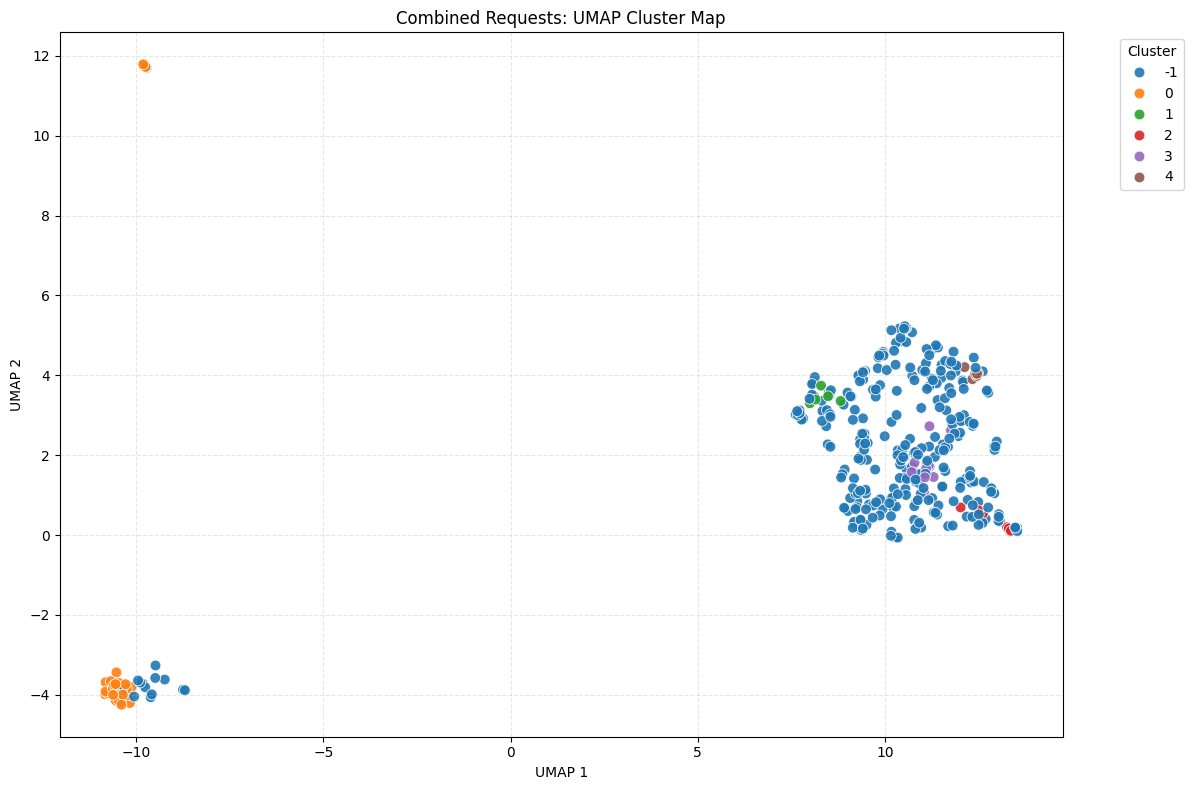

In [9]:
special_reqs_df = create_umap(npz_file_name="special_requests", csv_file_name="special_requests_clustered")
show_umap(special_reqs_df)

In [10]:
special_reqs_df.groupby("cluster")["request"].apply(lambda x: x.sample(min(5, len(x)))).to_frame()

request
cluster                                                       
-1      72                     מתי משפחת דראגופלצת באה להרים ?
        185                                        יאללה מסיבה
        50   מצטרפת לבקשה לגבי לונא מאירס, וגם מבקשת שמקס ע...
        377                                            נואופ:)
        73                                     יש לי יום הולדת
 0      214                                                אין
        311                                                אין
        10                                                 אין
        356                                                אין
        62                                                 אין
 1      276                                           יאלה כיף
        45                                                 כיף
        156                                          שיהיה כיף
        363                                           יאלה כיף
        320                                       שיהיה כיף :)
 2      174                                           תודה רבה
        202                                               תודה
        222                                            תודה 🙏🏾
        14                                                תודה
        141                                               תודה
 3      84                                              נצנצים
        343                                                  .
        231                                                  -
        245                                                  .
        330                                                  🧡
 4      238                                              🏳️‍⚧️
        226                                                 ❤️
        346                                                 ❤️
        102                                                  🤑
        227                                                 ❤️

In [11]:
special_reqs_df["cluster"].value_counts().sort_index()

cluster
-1    300
 0     40
 1      9
 2     12
 3     10
 4      7
Name: count, dtype: int64